# **CS F320 FODS Assignment - 2**

## **Assignemnt 2 - A**

### 1. Data Understanding and Representation

In [1]:
import pandas as pd
import numpy as np

car_data = pd.read_csv('Car_data.csv')

car_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [2]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


### 2. Implementing PCA using Covariance Matrices

In [3]:
mean = car_data.mean(numeric_only = True)
print(mean)

year           2017.100675
price         22896.685039
mileage       24827.244001
tax             126.011436
mpg              50.770022
engineSize        1.930709
dtype: float64


In [4]:
numeric = mean.keys()
print(numeric)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


In [5]:
centered_dataset = car_data.copy()
for column in numeric:
    if column != 'price':
        centered_dataset[column] = car_data[column] - mean[column]

centered_dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,-0.100675,12500,Manual,-9092.244001,Petrol,23.988564,4.629978,-0.530709
1,A6,-1.100675,16500,Automatic,11375.755999,Diesel,-106.011436,13.429978,0.069291
2,A1,-1.100675,11000,Manual,5118.755999,Petrol,-96.011436,4.629978,-0.530709
3,A4,-0.100675,16800,Automatic,1124.755999,Diesel,18.988564,16.529978,0.069291
4,A3,1.899325,17300,Manual,-22829.244001,Petrol,18.988564,-1.170022,-0.930709


In [6]:
centered_dataset.drop(labels = ['model', 'transmission', 'fuelType', 'price'], axis = 1, inplace = True)
cov_matrix = centered_dataset.cov(numeric_only = True)
features = np.array(centered_dataset)
cov_matrix

,year,mileage,tax,mpg,engineSize
year,4.698029,-4.023156e+04,13.549613,-9.859952,-0.041275
mileage,-40231.556769,5.524971e+08,-262953.809672,120264.702890,1002.150648
tax,13.549613,-2.629538e+05,4511.848374,-553.139078,15.919861
mpg,-9.859952,1.202647e+05,-553.139078,167.696842,-2.854824
engineSize,-0.041275,1.002151e+03,15.919861,-2.854824,0.363557


In [7]:
features

array([[-1.00674916e-01, -9.09224400e+03,  2.39885639e+01,
         4.62997750e+00, -5.30708661e-01],
       [-1.10067492e+00,  1.13757560e+04, -1.06011436e+02,
         1.34299775e+01,  6.92913386e-02],
       [-1.10067492e+00,  5.11875600e+03, -9.60114361e+01,
         4.62997750e+00, -5.30708661e-01],
       ...,
       [ 2.89932508e+00, -2.42182440e+04,  2.39885639e+01,
        -1.17002250e+00, -9.30708661e-01],
       [-1.00674916e-01, -1.61812440e+04,  2.39885639e+01,
        -2.87002250e+00, -5.30708661e-01],
       [-1.10067492e+00, -1.29722440e+04,  2.39885639e+01,
        -2.87002250e+00, -5.30708661e-01]])

### 3. Eigenvalue-Eigenvector Equation

In [8]:
e_values, e_vectors = np.linalg.eig(cov_matrix)

In [9]:
e_values

array([5.52497271e+08, 4.44392581e+03, 8.44121646e+01, 1.72584583e+00,
       2.82457928e-01])

In [10]:
e_vectors

array([[ 7.28176631e-05, -1.22350540e-03, -2.10100343e-02,
         9.99593344e-01, -1.92411557e-02],
       [-9.99999860e-01,  4.97635688e-04, -1.63185503e-04,
         6.98862164e-05, -7.28558351e-06],
       [ 4.75940888e-04,  9.93414801e-01,  1.14495419e-01,
         3.58032275e-03, -2.18799844e-03],
       [-2.17675259e-04, -1.14504431e-01,  9.93103163e-01,
         2.10014069e-02,  1.39189142e-02],
       [-1.81384120e-06,  3.74489446e-03, -1.39806367e-02,
         1.89542395e-02,  9.99715587e-01]])

### 4. Solving for Principal Components

In [11]:
e_indices = np.argsort(e_values)[::-1]
e_values = np.sort(e_values)[::-1]
e_indices

array([0, 1, 2, 3, 4])

In [12]:
e_vec_sorted = e_vectors[:, e_indices]
e_vec_sorted

array([[ 7.28176631e-05, -1.22350540e-03, -2.10100343e-02,
         9.99593344e-01, -1.92411557e-02],
       [-9.99999860e-01,  4.97635688e-04, -1.63185503e-04,
         6.98862164e-05, -7.28558351e-06],
       [ 4.75940888e-04,  9.93414801e-01,  1.14495419e-01,
         3.58032275e-03, -2.18799844e-03],
       [-2.17675259e-04, -1.14504431e-01,  9.93103163e-01,
         2.10014069e-02,  1.39189142e-02],
       [-1.81384120e-06,  3.74489446e-03, -1.39806367e-02,
         1.89542395e-02,  9.99715587e-01]])

In [13]:
k = int(input())

2


In [14]:
top_k_e_vec = e_vec_sorted[:, :k]
print(top_k_e_vec)

[[ 7.28176631e-05 -1.22350540e-03]
 [-9.99999860e-01  4.97635688e-04]
 [ 4.75940888e-04  9.93414801e-01]
 [-2.17675259e-04 -1.14504431e-01]
 [-1.81384120e-06  3.74489446e-03]]


### 5. Sequential Variance Increase

In [15]:
sequential_variance = []
total_variance = []
for i in range(len(e_values)):
    sequential_variance.append((e_values[i]/np.sum(e_values))*100)
    total_variance.append(np.sum(sequential_variance))

print(sequential_variance)
print(f'Total variance coveres with top {k} components: {total_variance[k - 1]} %')

[99.99918003049639, 0.0008043278408655511, 1.527817003872277e-05, 3.1236926868555626e-07, 5.112344029061647e-08]
Total variance coveres with top 2 components: 99.99998435833726 %


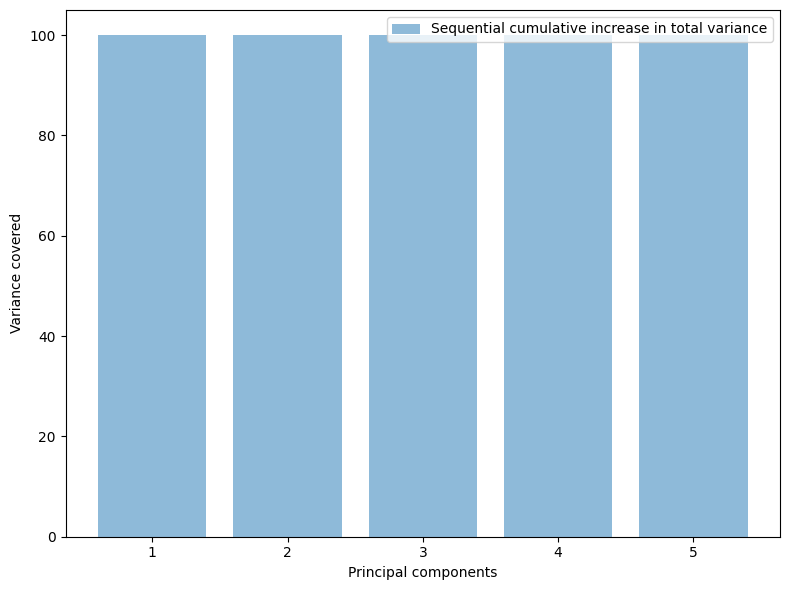

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(e_values)+1), total_variance, alpha=0.5, align='center', label='Sequential cumulative increase in total variance')
plt.ylabel('Variance covered')
plt.xlabel('Principal components')
plt.legend()
plt.tight_layout()

### 6. Visualization using Pair Plots

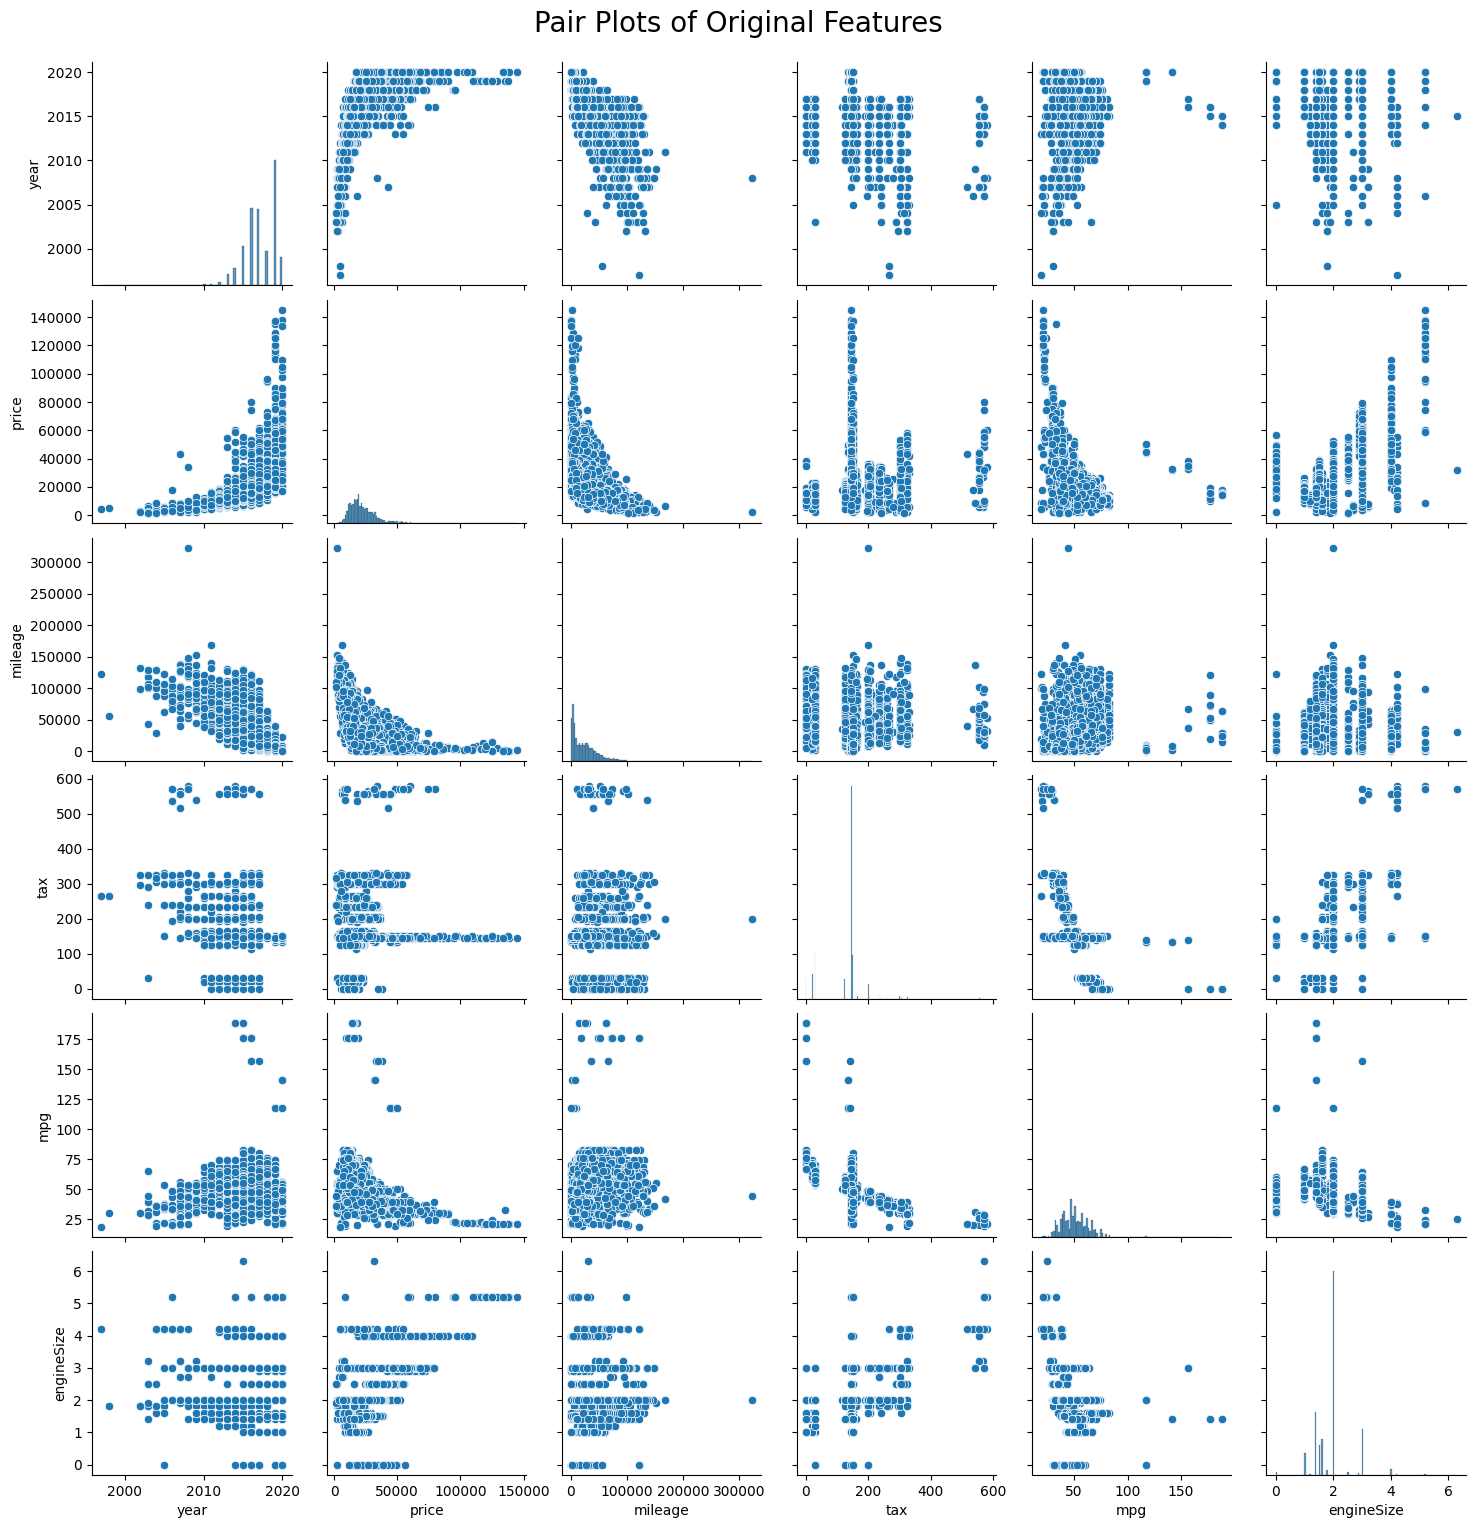

In [17]:
import seaborn as sbn

sbn.pairplot(car_data);
plt.suptitle('Pair Plots of Original Features', y = 1.02, size = 20)
plt.show()

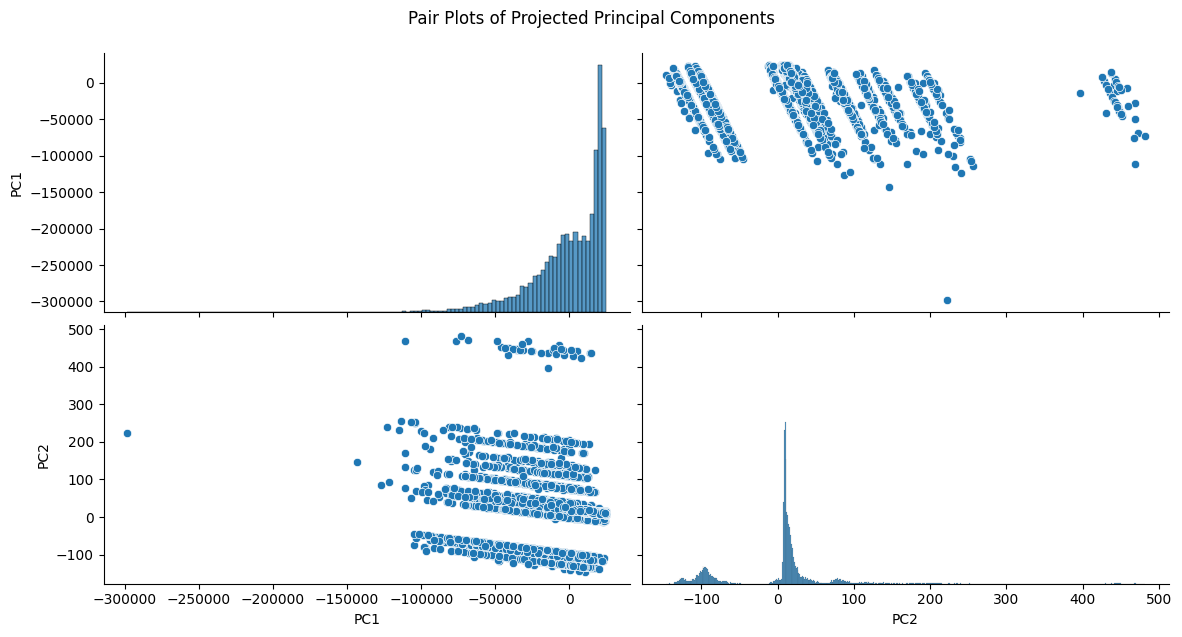

In [18]:
# Project the data onto the top k eigenvectors
projected_data = features.dot(top_k_e_vec)

# Project the principal components onto the pair plots
# Create a DataFrame with the projected data onto the top k eigenvectors
projected_data_df = pd.DataFrame(projected_data, columns=[f'PC{i+1}' for i in range(k)])

# Add the target variable to the projected data DataFrame
# projected_data_df['Car_Model'] = car_data['model']

# Plot pair plots of the projected principal components
sbn.pairplot(projected_data_df, height = 3, aspect = 2)
# sbn.pairplot(projected_data_df, hue='Car_Model')
# plt.xlim(-1.2, 1.2)
# plt.ylim(-1.2, 1.2)
plt.suptitle('Pair Plots of Projected Principal Components', y = 1.05)
plt.show()

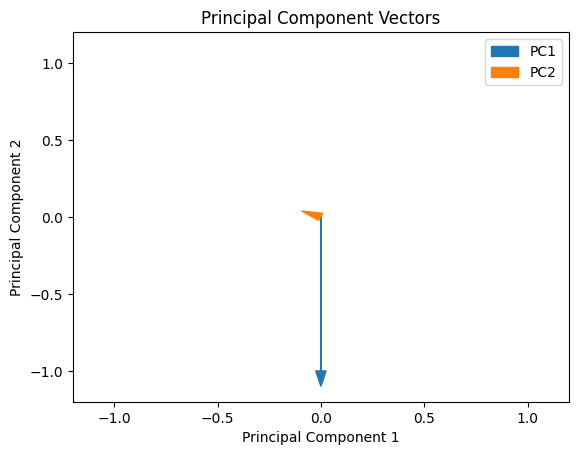

In [19]:
# Step 3: Visualize principal components as vectors on the pair plots
def plot_principal_component_vectors(eigenvectors, feature_names):
    for i, vector in enumerate(eigenvectors.T):
        plt.arrow(0, 0, vector[0], vector[1], head_width=0.05, head_length=0.1, fc=f'C{i}', ec=f'C{i}', label=f'PC{i+1}')

    plt.legend()
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Principal Component Vectors')

# Plot principal component vectors on the pair plot
plt.figure()
plot_principal_component_vectors(top_k_e_vec, car_data.columns[1:])
plt.show()

### 7. Conclusion and Interpretation

The Principal Component Analysis (PCA) conducted on the dataset with five features, namely year, mileage, tax, mpg, and engineSize, yielded insightful results. The eigenvalues of the covariance matrix provide a glimpse into the variance captured by each principal component, and the corresponding eigenvectors offer valuable information about the direction and magnitude of the original features in the new principal component space.

**1.   Eigenvalues and Variance:**The eigenvalues of the covariance matrix are [5.52497271e+08, 4.44392581e+03, 8.44121646e+01, 1.72584583e+00, 2.82457928e-01]. These values indicate the amount of variance explained by each principal component. The first principal component captures a vast majority of the variance, followed by the subsequent components. The sequential variance increase further emphasizes the dominance of the first principal component, which accounts for percentage of the total variance (99.99918%).

**2.   Dimensionality Reduction and Insights:**The effectiveness of dimensionality reduction is evident in the concentration of variance in the first few principal components. The substantial drop in variance after the first component suggests that a significant portion of the original data's information can be retained with fewer dimensions. This reduction not only facilitates computational efficiency but also aids in simplifying the interpretation of the dataset.

**3.   Visualizations and Data Representation:**The dominance of the first principal component implies that a considerable amount of variability in the dataset can be captured by examining this single dimension.

In conclusion, the PCA analysis proves to be a powerful tool for understanding the underlying structure of the dataset, emphasizing the importance of certain features, and facilitating dimensionality reduction for more efficient analysis.



## **Assignemnt 2 - B**

### 1. Exploratory Data Analysis (EDA)

In [27]:
import pandas as pd
import numpy as np

hitters_data = pd.read_excel('Hitters.xlsx')

hitters_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [28]:
hitters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [29]:
hitters_data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [30]:
# Dropping rows with null values of salary
hitters_data.dropna(inplace = True)

In [32]:
def get_unique_values(hitters_data):

    output_data = []

    for col in hitters_data.columns:

        # If the number of unique values in the column is less than or equal to 5
        if hitters_data.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = hitters_data.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, hitters_data.loc[:, col].nunique(), unique_values, hitters_data.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, hitters_data.loc[:, col].nunique(),"-", hitters_data.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

get_unique_values(hitters_data)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,AtBat,209,-,int64
1,Hits,130,-,int64
2,HmRun,35,-,int64
3,Runs,92,-,int64
4,RBI,94,-,int64
5,Walks,87,-,int64
6,Years,21,-,int64
7,CAtBat,257,-,int64
8,CHits,241,-,int64
9,CHmRun,129,-,int64


In [33]:
# Deriving new stats from career stats by averageing them out
hitters_data['AvgAtBat'] = hitters_data['CAtBat'] / hitters_data['Years']
hitters_data['AvgHits'] = hitters_data['CHits'] / hitters_data['Years']
hitters_data['AvgHmRun'] = hitters_data['CHmRun'] / hitters_data['Years']
hitters_data['AvgRuns'] = hitters_data['CRuns'] / hitters_data['Years']
hitters_data['AvgRBI'] = hitters_data['CRBI'] / hitters_data['Years']
hitters_data['AvgWalks'] = hitters_data['CWalks'] / hitters_data['Years']
hitters_data['League'].replace(['A', 'N'], [1, 2], inplace = True)
hitters_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,AvgAtBat,AvgHits,AvgHmRun,AvgRuns,AvgRBI,AvgWalks
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000
5,594,169,4,74,51,35,11,4408,1133,19,...,421,25,750.0,A,400.727273,103.000000,1.727273,45.545455,30.545455,17.636364


In [34]:
cleaned_data = hitters_data.drop(columns = ['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'Years', 'NewLeague', 'Division'])

In [35]:
features =cleaned_data.drop(columns = 'Salary')
target = cleaned_data['Salary']

### 2. PCA Analysis

In [36]:
mean = features.mean()
print(mean)

AtBat       403.642586
Hits        107.828897
HmRun        11.619772
Runs         54.745247
RBI          51.486692
Walks        41.114068
League        1.471483
PutOuts     290.711027
Assists     118.760456
Errors        8.593156
AvgAtBat    335.510010
AvgHits      89.926406
AvgHmRun      8.549680
AvgRuns      45.287435
AvgRBI       40.409564
AvgWalks     31.934871
dtype: float64


In [37]:
attr = mean.keys()
print(attr)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'League', 'PutOuts',
       'Assists', 'Errors', 'AvgAtBat', 'AvgHits', 'AvgHmRun', 'AvgRuns',
       'AvgRBI', 'AvgWalks'],
      dtype='object')


In [38]:
centered_dataset = features.copy()
for column in attr:
    centered_dataset[column] = cleaned_data[column] - mean[column]

centered_dataset.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,League,PutOuts,Assists,Errors,AvgAtBat,AvgHits,AvgHmRun,AvgRuns,AvgRBI,AvgWalks
1,-88.642586,-26.828897,-4.619772,-30.745247,-13.486692,-2.114068,0.528517,341.288973,-75.760456,1.406844,-89.152867,-30.283549,-3.621109,-22.358864,-10.838135,-5.149157
2,75.357414,22.171103,6.380228,11.254753,20.513308,34.885932,-0.471483,589.288973,-36.760456,5.406844,205.823324,62.406927,12.450320,29.379232,48.257103,55.731795
3,92.357414,33.171103,8.380228,10.254753,26.513308,-4.114068,0.528517,-90.711027,-107.760456,-5.593156,176.126354,53.255412,11.904865,29.985292,35.772255,0.246947
4,-82.642586,-20.828897,-1.619772,-15.745247,-9.486692,-11.114068,0.528517,514.288973,-78.760456,-4.593156,-137.510010,-39.426406,-2.549680,-21.287435,-17.409564,-15.434871
5,190.357414,61.171103,-7.619772,19.254753,-0.486692,-6.114068,-0.471483,-8.711027,302.239544,16.406844,65.217263,13.073594,-6.822407,0.258019,-9.864109,-14.298508


In [39]:
cov_matrix = centered_dataset.cov(numeric_only = True)
cov_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,League,PutOuts,Assists,Errors,AvgAtBat,AvgHits,AvgHmRun,AvgRuns,AvgRBI,AvgWalks
AtBat,21699.413752,6407.778307,716.073506,3385.336081,3034.976141,1997.750849,-11.285040,12767.090979,7311.532377,316.850216,12626.937478,3790.203098,401.129618,2009.749764,1770.760532,998.623369
Hits,6407.778307,2036.295040,209.686602,1049.494413,920.915653,575.584477,-3.464822,3785.694642,1990.065727,83.437756,3821.309450,1206.627879,114.984807,618.749784,545.527143,291.724677
HmRun,716.073506,209.686602,76.686936,141.143224,192.456753,83.768728,-0.976533,615.137796,-205.312803,-0.563681,457.081697,135.101375,47.167431,84.079490,122.006083,51.281583
Runs,3385.336081,1049.494413,141.143224,652.282182,514.746597,386.616956,-2.631338,1938.651293,664.209735,32.499013,2036.989716,626.156530,78.363446,374.117825,301.352766,209.469564
RBI,3034.976141,920.915653,192.456753,514.746597,669.914899,320.131295,-2.405915,2261.053392,236.200998,25.675863,1849.989143,566.451966,118.902406,303.375595,399.114292,171.197991
Walks,1997.750849,575.584477,83.768728,386.616956,320.131295,471.673962,-0.714292,1707.498737,323.035062,11.756509,1339.640587,396.118030,61.344521,255.740870,225.391530,277.051352
League,-11.285040,-3.464822,-0.976533,-2.631338,-2.405915,-0.714292,0.250138,5.533713,3.777494,0.303239,-3.229556,-0.975702,-0.578844,-0.930177,-1.178197,-0.251112
PutOuts,12767.090979,3785.694642,615.137796,1938.651293,2261.053392,1707.498737,5.533713,78363.366557,-1762.206891,139.271297,6915.757727,2300.534008,443.571498,1121.708333,1661.841248,942.898187
Assists,7311.532377,1990.065727,-205.312803,664.209735,236.200998,323.035062,3.777494,-1762.206891,21048.373698,674.299118,3943.223898,1002.842575,-206.196597,309.505827,-81.243084,12.639893
Errors,316.850216,83.437756,-0.563681,32.499013,25.675863,11.756509,0.303239,139.271297,674.299118,43.646823,166.048438,41.121033,-3.010779,13.386113,6.859532,-1.508271


In [40]:
e_values, e_vectors = np.linalg.eig(cov_matrix)

In [41]:
e_values

array([8.36014042e+04, 3.64880188e+04, 1.68649907e+04, 6.93177187e+03,
       4.18124987e+02, 3.01221633e+02, 1.79303424e+02, 7.99416990e+01,
       4.11737512e+01, 2.73923997e+01, 2.49547329e+01, 2.01555927e+01,
       1.11413530e+01, 8.88766644e+00, 1.37224513e+00, 2.21580623e-01])

In [42]:
e_indices = np.argsort(e_values)[::-1]
e_values = np.sort(e_values)[::-1]
e_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [43]:
e_vec_sorted = e_vectors[:, e_indices]

In [44]:
sequential_variance = []
for i in range(len(e_values)):
    sequential_variance.append((e_values[i]/np.sum(e_values))*100)

print(sequential_variance)

[57.65611034897557, 25.164137587492174, 11.63102193474209, 4.780529799796019, 0.28836190778831594, 0.20773894774260257, 0.12365746857209473, 0.05513217711830074, 0.028395675460400994, 0.018891300190388458, 0.01721015154259353, 0.013900401414173065, 0.007683687676644549, 0.006129421896227748, 0.0009463754500807102, 0.00015281414230789155]


In [63]:
no_components = int(input())

6


In [64]:
k_s = []
for i in range(no_components):
    k_s.append(i + 1)

In [65]:
projected_data = []
for k in k_s:
    total_variance = 0
    for i in range(k):
        total_variance += sequential_variance[i]

    print(f'Total variance coveres with {k} components: {total_variance} %')

    top_k_e_vec = e_vec_sorted[:, :k]

    # Project the data onto the top k eigenvectors
    input_mat = np.array(features)
    projected_data.append(input_mat.dot(top_k_e_vec))

Total variance coveres with 1 components: 57.65611034897557 %
Total variance coveres with 2 components: 82.82024793646774 %
Total variance coveres with 3 components: 94.45126987120983 %
Total variance coveres with 4 components: 99.23179967100585 %
Total variance coveres with 5 components: 99.52016157879416 %
Total variance coveres with 6 components: 99.72790052653676 %


### 3. Model Training and MSE/RMSE Calculation

In [66]:
# Code of Stochastic Gradient Descent
def sgd(X_poly, w, y_pred,y_train, index, lrR):
    gradient = np.dot(X_poly.T, (y_pred - y_train))
    w -= lrR * gradient
    return w

# Code for Root Mean Square Error
def RMSError(y_pred, y_train):
    n, _ = y_pred.shape
    mse = np.mean((y_pred - y_train) ** 2)
    return np.sqrt(mse)

# Generate polynomial features for the input matrix X up to the specified degree
def poly_features(X_train, degree):
    n, m = X_train.shape
    X_poly = np.ones((n, 1))  # Include the bias term

    for d in range(1, degree + 1):
        for i in range(m):
            X_poly = np.c_[X_poly, X_train[:, i]**d]

    return X_poly


In [67]:
import random
final_rmse = []
final_weights = []
# learning rate
lr = [0.00000000000001, 0.00000000000001, 0.00000000000001, 0.00000000000001, 0.00000000000001, 0.00000000000001]
epochs = [5000, 5000, 5000, 5000, 5000, 5000]

for k in k_s:
    x = projected_data[k - 1]
    y = np.array(target)

    # Setting splitting ratio and getting the splitting index
    split_ratio = 0.9
    split_index = int(len(x) * split_ratio)

    # Splitting the data into training and testing sets (90% training, 10% testing)
    X_train, X_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index].reshape(-1, 1), y[split_index:].reshape(-1, 1)

    # Error list of all training models including all iterations from 0 to 500
    train_errors = []

    # Error list of all training models after all iterations
    final_train_error = 0.0

    # Define the degree of the polynomial
    degree = 2

    # Create polynomial features
    X_poly = poly_features(X_train, degree)


    # Function which calculates error and updates weight parameters for all epochs including all models
    n, m = X_poly.shape
    # weights = np.zeros((m, 1))
    weights = np.ones((m, 1))
    weights *= 0.00082
    for j in range(epochs[k - 1]):
        y_pred = np.dot(X_poly, weights)
        rmse = RMSError(y_pred, y_train)
        train_errors.append(rmse)
        index = random.randint(0, n - 1)
        weights = sgd(X_poly, weights, y_pred, y_train, index, lr[k - 1])

    final_train_error = train_errors[-1]

    final_rmse.append(final_train_error)
    final_weights.append(weights)
    print(final_train_error)

545.3983693192015
418.46081339878083
373.7968969444845
373.655503963979
373.64617738218925
373.66301416799854


### 4. Plotting Number of Components vs RMSE

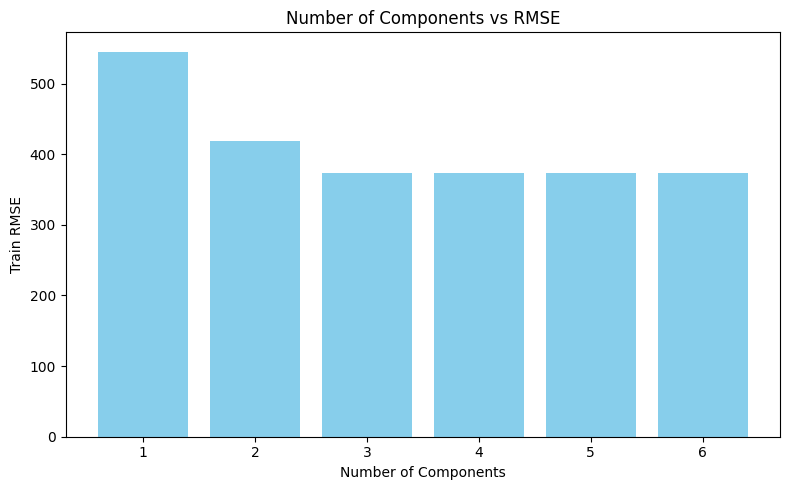

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(k_s, final_rmse, color='skyblue')
plt.xlabel('Number of Components')
plt.ylabel('Train RMSE')
plt.title('Number of Components vs RMSE')
plt.tight_layout()
plt.show()

In [69]:
best_k = np.argmin(final_rmse) + 1
print(best_k)

5


### 5. Testing the Most Efficient Model

In [70]:
x = projected_data[best_k - 1]
y = np.array(target)

# Setting splitting ratio and getting the splitting index
split_ratio = 0.9
split_index = int(len(x) * split_ratio)

# Splitting the data into training and testing sets (90% training, 10% testing)
X_test = x[split_index:]
y_test = y[split_index:].reshape(-1, 1)

# Evaluate the accuracy
X_test_p = poly_features(X_test, degree)
y_pred = np.dot(X_test_p, final_weights[best_k - 1])
rmse = RMSError(y_pred, y_test)
# accuracy = np.mean(y_pred == y_test)
print(f"Testing RMSE for {best_k} compoments: {rmse}")
# print(f"Accuracy for {best_k} compoments: {accuracy * 100} %")

Testing RMSE for 5 compoments: 453.78515958366125


In [71]:
print(y_test[:3])
print(y_pred[:3])

[[740.]
 [425.]
 [925.]]
[[1051.36669738]
 [ 173.64840689]
 [ 630.53558197]]


### 6. Conclusion and Analysis



**1.   Eigenvalues and Variance:**The eigenvalues of the covariance matrix for the dataset with 16 features showcase a decreasing order of magnitude, indicating the variance explained by each principal component. The sequential variance, which represents the percentage of total variance captured by each component, helps in understanding the significance of dimensionality reduction.

***Sequential Variance:***
*Component 1: 57.66%*
*Component 2: 82.82%*
*Component 3: 94.45%*
*Component 4: 99.23%*
*Component 5: 99.52%*
*Component 6: 99.73%*

**2.   RMSE Evaluation:**RMSE values for models with different numbers of components provide insights into the trade-off between dimensionality reduction and prediction accuracy. The RMSE decreases as the number of components increases, reaching a minimum or stabilizing point at 5 components. This observation indicates that a model with 5 components achieves a balance between capturing sufficient variance and avoiding overfitting.

*RMSE for 1 component: 545.40*
*RMSE for 2 components: 418.46*
*RMSE for 3 components: 373.80*
*RMSE for 4 components: 373.66*
*RMSE for 5 components: 373.65 (Minimum)*
*RMSE for 6 components: 373.66*

**3. Efficient Model Selection:**The point where RMSE reaches a minimum or starts stabilizing (in this case, at 5 components) signifies the most efficient model. Selecting an appropriate number of components is crucial for achieving a balance between dimensionality reduction and predictive efficiency.The model with 5 components captures a high percentage of variance while maintaining a relatively low RMSE.

**4.  Model Evaluation and Prediction:**The testing dataset RMSE for the chosen 5-component model is 453.79, reflecting its predictive performance on unseen data. Examining the actual and predicted values for specific instances further confirms the model's effectiveness in approximating the target variable.

*Actual values:* [740, 425, 925]

*Predicted values:* [[1051.37, 173.65, 630.54]]

The analysis suggests potential optimization avenues, such as adjusting the number of features, learning rate, or exploring different models. Fine-tuning these parameters could further minimize RMSE, enhancing the model's predictive capabilities.

In conclusion, the PCA analysis, coupled with RMSE evaluation, offers valuable insights into dimensionality reduction and model efficiency. Selecting an appropriate number of components is crucial for achieving a balance between capturing variance and predictive accuracy.

